## Use ResNet50 without last layer as a model

In [12]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

Using TensorFlow backend.


In [14]:
from keras.models import Model

my_model = Model(inputs=model.input, outputs=model.get_layer(index=-2).output)

## Download images of 2 classes from google search

In [ ]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()

arguments = {"keywords":"pinguin,putin", "limit":50}
absolute_image_paths = response.download(arguments=arguments)

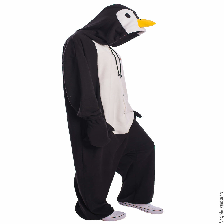

In [86]:
image.load_img(sources1[49], target_size=(224, 224))

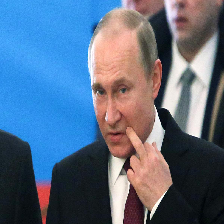

In [176]:
image.load_img(sources2[17], target_size=(224, 224))

## Get the output of my_model for the two classes

In [101]:
pth1 = '/Users/user/ml_projects/ml_practicals/Clustering/downloads/pinguin/'
pth2 = '/Users/user/ml_projects/ml_practicals/Clustering/downloads/Putin/'

class1 = [image.load_img(os.path.join(pth1, f), target_size=(224, 224)) for f in listdir(pth1) if f!='.DS_Store']
class2 = [image.load_img(os.path.join(pth2, f), target_size=(224, 224)) for f in listdir(pth2) if f!='.DS_Store']

In [107]:
cl1 = [image.img_to_array(img_) for img_ in class1]
cl1 = [np.expand_dims(x, axis=0) for x in cl1]
cl1 = [preprocess_input(x) for x in cl1]

cl2 = [image.img_to_array(img_) for img_ in class2]
cl2 = [np.expand_dims(x, axis=0) for x in cl2]
cl2 = [preprocess_input(x) for x in cl2]

In [ ]:
preds1 = [my_model.predict(np.array(x)) for x in cl1]
preds2 = [my_model.predict(np.array(x)) for x in cl2]

In [ ]:
D = np.asarray([el[0] for el in preds1+preds2])
D.shape

## Clusterize vectors using K-MEANS

In [164]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(D)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

## Plot the vectors in a 2-D space using t-SNE

In [169]:
#Here is a utility function used to display the transformed dataset
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 2))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    labels = ['pinguin', 'V.V. Putin']
    for i in range(2):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, labels[i], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


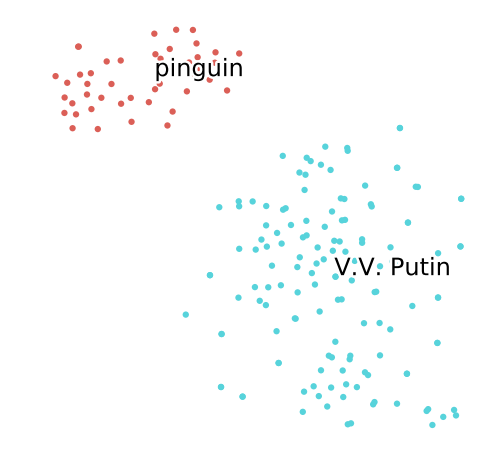

In [170]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA


pca = PCA(n_components=50)
pca_result = pca.fit_transform(D)

tsne_pca = TSNE().fit_transform(pca_result, kmeans.labels_)
scatter(tsne_pca, kmeans.labels_)
plt.savefig('tsne-pca-generated.png', dpi=120)

In [ ]:
## the case of Puting and pinguin was to easy for clustering algorithm